# Classification - Mini-Project 2

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Ahmed Mohamed Samy Elwassif

ID:52-0267

Tutorial: T2

---

Name: Mohamed Sherif

ID: 52-0982

Tutorial: T2

---

Name:

ID:

Tutorial:

---


## Dataset Description

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

Each row represents a customer, and each column represents customer attributes as described below.

| Column | Description|
|-|-|
|gender|Whether the customer is a male or a female|
|SeniorCitizen| Whether the customer is a senior citizen or not (1, 0)|
|Partner|Whether the customer has a partner or not (Yes, No)|
|Dependents|Whether the customer has dependents or not (Yes, No)|
|tenure| Number of months the customer has stayed with the company|
|PhoneService|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines|Whether the customer has multiple lines or not (Yes, No, No phone service*)|
|InternetService|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity|Whether the customer has online security or not (Yes, No, No internet service**)|
|OnlineBackup|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV|Whether the customer has streaming TV or not (Yes, No, No internet service) |
|StreamingMovies|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod|The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges|The amount charged to the customer monthly|
|TotalCharges|The total amount charged to the customer|
|Churn|Whether the customer churned or not (Yes or No)|

\* No phone service means the customer's plan does not include calling (could be a data-only plan)

\*\* No internet service means the customer's plan does not include internet/data and so the addon package does not apply

## Importing Libraries & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use("seaborn")

df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2023/main/data/telecom_churn.csv')



df.head()

<ipython-input-38-4af7e78aef40>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$29.85/m,$29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,$56.95/m,$1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,$53.85/m,$108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),$42.3/m,$1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,$70.7/m,$151.65,Yes


## Data Inspection

In [ ]:
#We are just inspecting the data here checking null values,types of columns and name of columns and its meta data


df.info()
pd.set_option("display.float_format", "{:.2f}".format)
df.describe()
df.isnull().sum()

for column in df.columns:
    print(f"{column} : {df[column].unique()}")
    print("====================================")
# iterate over columns to get the number of unique values
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print("==========================================================")
# print the column with its unique values
    categorical_col = []
for column in df.columns:
    if df[column].dtype == object:
        categorical_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print("====================================")
        df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        6976 non-null   object
 1   gender            7032 non-null   object
 2   SeniorCitizen     7032 non-null   int64 
 3   Partner           7032 non-null   object
 4   Dependents        7032 non-null   object
 5   tenure            7032 non-null   int64 
 6   PhoneService      7032 non-null   object
 7   MultipleLines     7032 non-null   object
 8   InternetService   7032 non-null   object
 9   OnlineSecurity    7032 non-null   object
 10  OnlineBackup      7032 non-null   object
 11  DeviceProtection  7032 non-null   object
 12  TechSupport       7032 non-null   object
 13  StreamingTV       7032 non-null   object
 14  StreamingMovies   7032 non-null   object
 15  Contract          7032 non-null   object
 16  PaperlessBilling  7032 non-null   object
 17  PaymentMethod 

In [ ]:
#Checking the number of yes and no in the dependent variable
df['Churn'].value_counts()


No     5163
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#checking the percentage of the total number of yes and no and it is clearly shown that the dataset is not balanced at all
df['Churn'].value_counts() / df['Churn'].count()


No    0.73
Yes   0.27
Name: Churn, dtype: float64

## Data Cleaning

In [ ]:
#Remove $sign from total chaarges
df['TotalCharges'] = df['TotalCharges'].str.replace('$', "")
#Convert values in total charges to be numerical
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
#drop column customerId since it is has unique values for every row hence we dont feel it would be efficient including it later in the decision tree nor the visualization
df=df.drop('customerID',axis=1)
# Remove /m and $ sign from MonthlyCharges so we can use it later in exploration
df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '').str.replace('$', '')
#Convert values in MonthlyCharges to be numerical so we can use it later in exploration
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])


<ipython-input-47-1caeac7e3927>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TotalCharges'] = df['TotalCharges'].str.replace('$', "")
<ipython-input-47-1caeac7e3927>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['MonthlyCharges'] = df['MonthlyCharges'].str.replace('/m', '').str.replace('$', '')


In [ ]:
# Organize the values in the categorical column MultipleLines making sure of its order
df['MultipleLines'] = pd.Categorical(df['MultipleLines'],
                                      categories=['Yes', 'No', 'No phone service'],
                                      ordered=True)
df['MultipleLines']


0       No phone service
1                     No
2                     No
3       No phone service
4                     No
              ...       
7027                 Yes
7028                 Yes
7029    No phone service
7030                 Yes
7031                  No
Name: MultipleLines, Length: 7032, dtype: category
Categories (3, object): ['Yes' < 'No' < 'No phone service']

In [ ]:

# Organize the values in the categorical column MultipleLines making sure of its order


df['OnlineSecurity'] = pd.Categorical(df['OnlineSecurity'],
                                      categories=['Yes', 'No', 'No phone service'],
                                      ordered=True)
df['OnlineSecurity']


0        No
1       Yes
2       Yes
3       Yes
4        No
       ... 
7027    Yes
7028     No
7029    Yes
7030     No
7031    Yes
Name: OnlineSecurity, Length: 7032, dtype: category
Categories (3, object): ['Yes' < 'No' < 'No phone service']

In [ ]:
# Organize the values in the categorical column making sure of its order
df['DeviceProtection'] = pd.Categorical(df['DeviceProtection'],
                                      categories=['Yes', 'No', 'No internet service'],
                                      ordered=True)
df['DeviceProtection']

0        No
1       Yes
2        No
3       Yes
4        No
       ... 
7027    Yes
7028    Yes
7029     No
7030     No
7031    Yes
Name: DeviceProtection, Length: 7032, dtype: category
Categories (3, object): ['Yes' < 'No' < 'No internet service']

In [ ]:
# Organize the values in the categorical column making sure of its order
df['TechSupport'] = pd.Categorical(df['TechSupport'],
                                      categories=['Yes', 'No', 'No internet service'],
                                      ordered=True)
df['TechSupport']

0        No
1        No
2        No
3       Yes
4        No
       ... 
7027    Yes
7028     No
7029     No
7030     No
7031    Yes
Name: TechSupport, Length: 7032, dtype: category
Categories (3, object): ['Yes' < 'No' < 'No internet service']

In [ ]:
# Organize the values in the categorical column making sure of its order
df['StreamingTV'] = pd.Categorical(df['StreamingTV'],
                                      categories=['Yes', 'No', 'No internet service'],
                                      ordered=True)
df['StreamingTV']

0        No
1        No
2        No
3        No
4        No
       ... 
7027    Yes
7028    Yes
7029     No
7030     No
7031    Yes
Name: StreamingTV, Length: 7032, dtype: category
Categories (3, object): ['Yes' < 'No' < 'No internet service']

In [ ]:
#Null values would lead to errors in data exploration and modeling so we need to take an action so we decided to replace the null values with the mean

#Replace the Nan values in TotalCharge with None
df['TotalCharges'] = df['TotalCharges'].replace('NaN', None)
#Getting the mean
mean_value=df['TotalCharges'].mean()
# Replace the none values with the mean
df['TotalCharges'].fillna(mean_value, inplace=True)
print(mean_value)

2281.933932038835


In [ ]:
#Encoding dependent variable from categrocial to numerical so we can use it later in the exploration and modeling

df['Churn'] = df['Churn'].astype('category').cat.codes


In [ ]:
#Label encoding will consider the alphabetical order to order categories. So, when we apply Label encoding, we make sure that we are explicitly specifying the correct order to avoid this problem.

df['Contract'] = pd.Categorical(df['Contract'],
                                      categories=['Month-to-month', 'One year', 'Two year'],
                                      ordered=True)
df['Contract']

0       Month-to-month
1             One year
2       Month-to-month
3             One year
4       Month-to-month
             ...      
7027          One year
7028          One year
7029    Month-to-month
7030    Month-to-month
7031          Two year
Name: Contract, Length: 7032, dtype: category
Categories (3, object): ['Month-to-month' < 'One year' < 'Two year']

In [ ]:
df.head(20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0


## Exploratory Data Analysis

In [ ]:
#Removing the "now" numerical columns from the array of categorical feature since we they are not categorical anymore hence we need to remove it
categorical_features = categorical_col.copy()
categorical_features.remove('Churn')
categorical_features.remove('customerID')
categorical_features.remove('MonthlyCharges')
categorical_features.remove('TotalCharges')
categorical_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']



*   In the contract , month to month has the highest churn.

*   In the partner, no has the highest churn.

*   In the dependents, no has the highest churn


*   In the internet service , fiber has the highest churn.

*   In Streaming tv,Tech support, Device protection no has the highest churn.

*   In Online Security, yes has the highest churn.


* In the gender, female has the highest churn.




In [ ]:
correlation_matrix = df.corr()

# Display the correlation matrix
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn
SeniorCitizen            1.00    0.02            0.22          0.09   0.15
tenure                   0.02    1.00            0.25          0.78  -0.35
MonthlyCharges           0.22    0.25            1.00          0.61   0.19
TotalCharges             0.09    0.78            0.61          1.00  -0.19
Churn                    0.15   -0.35            0.19         -0.19   1.00


<ipython-input-58-abc9c28cf830>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


**Q1: What are the most correlated attributes with customer churn?**

**Visualization**

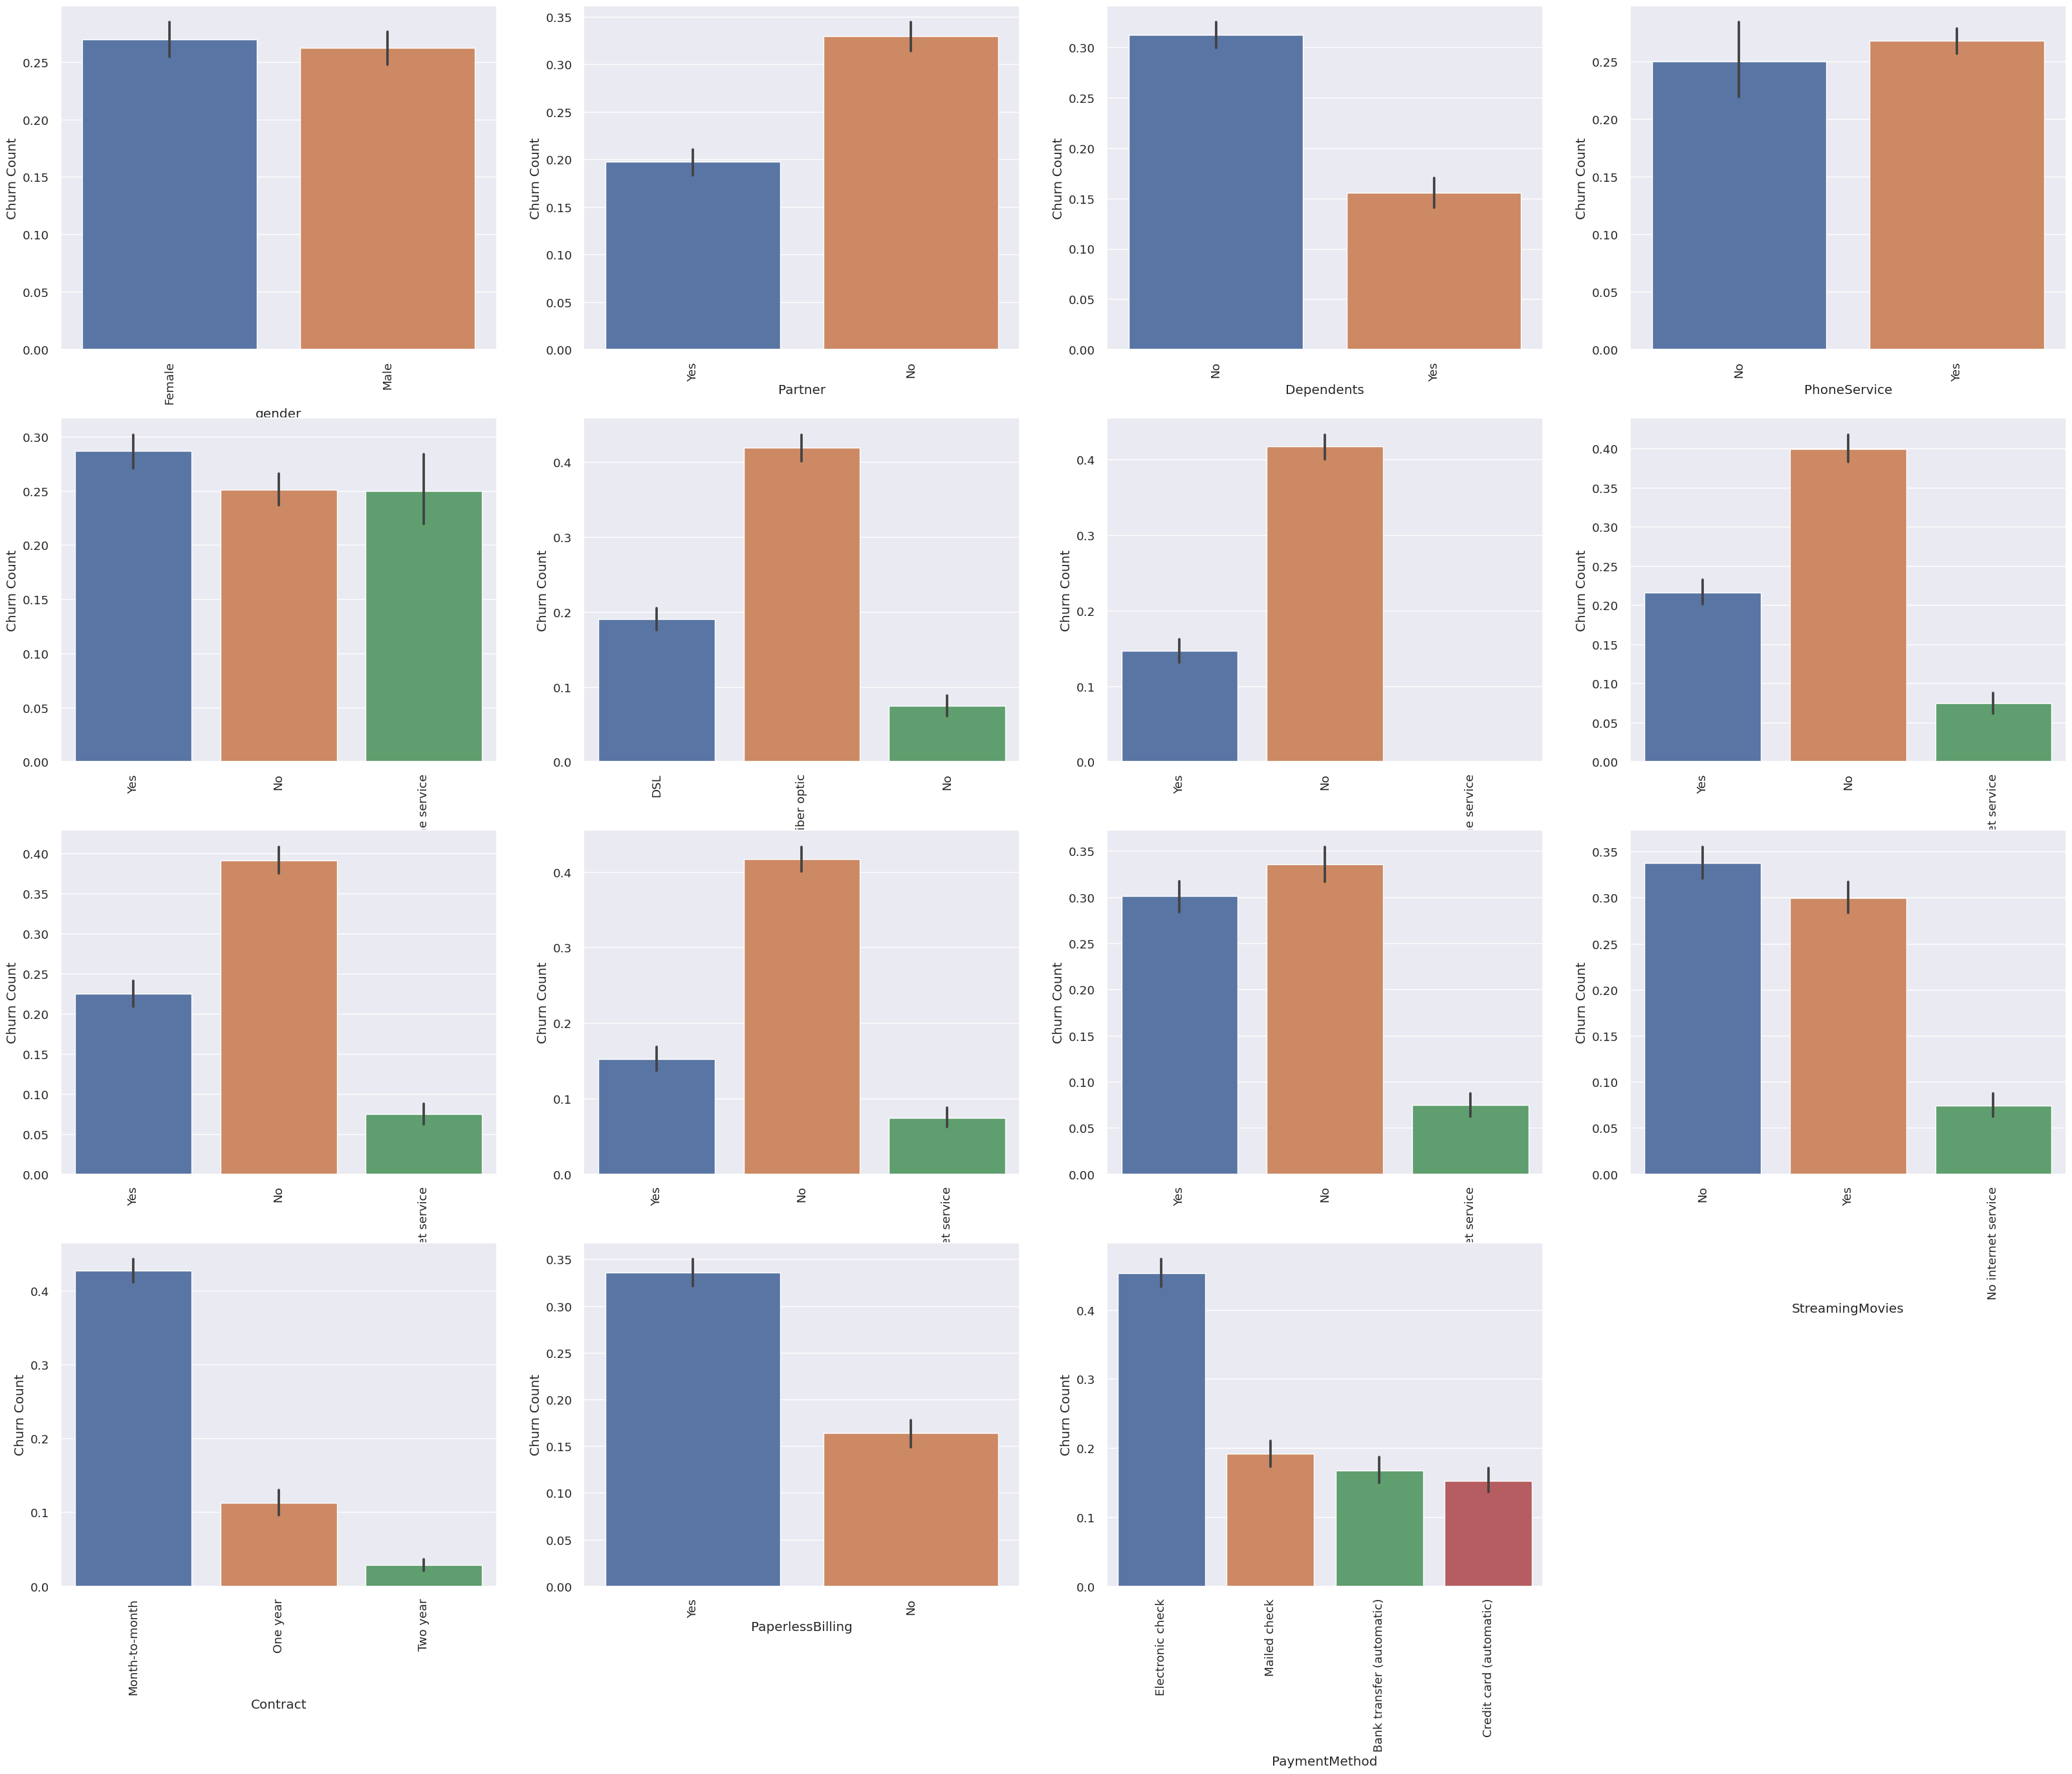

In [ ]:
 #Plotting every feature average in relation to the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

#if 'customerID' in categorical_features:
    #categorical_features.remove('customerID')

for i, column in enumerate(categorical_features, 1):
    plt.subplot(5, 4, i)
    g = sns.barplot(x=column, y='Churn', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('Churn Count')
    plt.xlabel(f'{column}')

In [ ]:
categorical_col_2 = categorical_features
df_copy = df.copy()
df_copy=df_copy.drop('tenure',axis=1)
df_copy=df_copy.drop('MonthlyCharges',axis=1)
df_copy=df_copy.drop('TotalCharges',axis=1)

for column in categorical_col_2:
    df_copy[column] = df_copy[column].astype('category').cat.codes
df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,2,0,1,2,1,1,1,0,Month-to-month,1,2,0
1,1,0,0,0,1,1,0,0,0,0,1,1,0,One year,0,3,0
2,1,0,0,0,1,1,0,0,2,1,1,1,0,Month-to-month,1,3,1
3,1,0,0,0,0,2,0,0,0,0,0,1,0,One year,0,0,0
4,0,0,0,0,1,1,1,1,0,1,1,1,0,Month-to-month,1,2,1


In [ ]:
correlation_matrix = df_copy.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
gender              1.00          -0.00    -0.00        0.01         -0.01   
SeniorCitizen      -0.00           1.00     0.02       -0.21          0.01   
Partner            -0.00           0.02     1.00        0.45          0.02   
Dependents          0.01          -0.21     0.45        1.00         -0.00   
PhoneService       -0.01           0.01     0.02       -0.00          1.00   
MultipleLines       0.01          -0.11    -0.12        0.02         -0.67   
InternetService    -0.00          -0.03     0.00        0.04          0.39   
OnlineSecurity      0.00           0.21    -0.08       -0.19         -0.13   
OnlineBackup       -0.01          -0.01     0.15        0.09          0.02   
DeviceProtection    0.00          -0.14    -0.10        0.07          0.14   
TechSupport         0.01          -0.07    -0.08        0.04          0.16   
StreamingTV         0.01          -0.17    

<ipython-input-84-2c832ca033f7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_copy.corr()


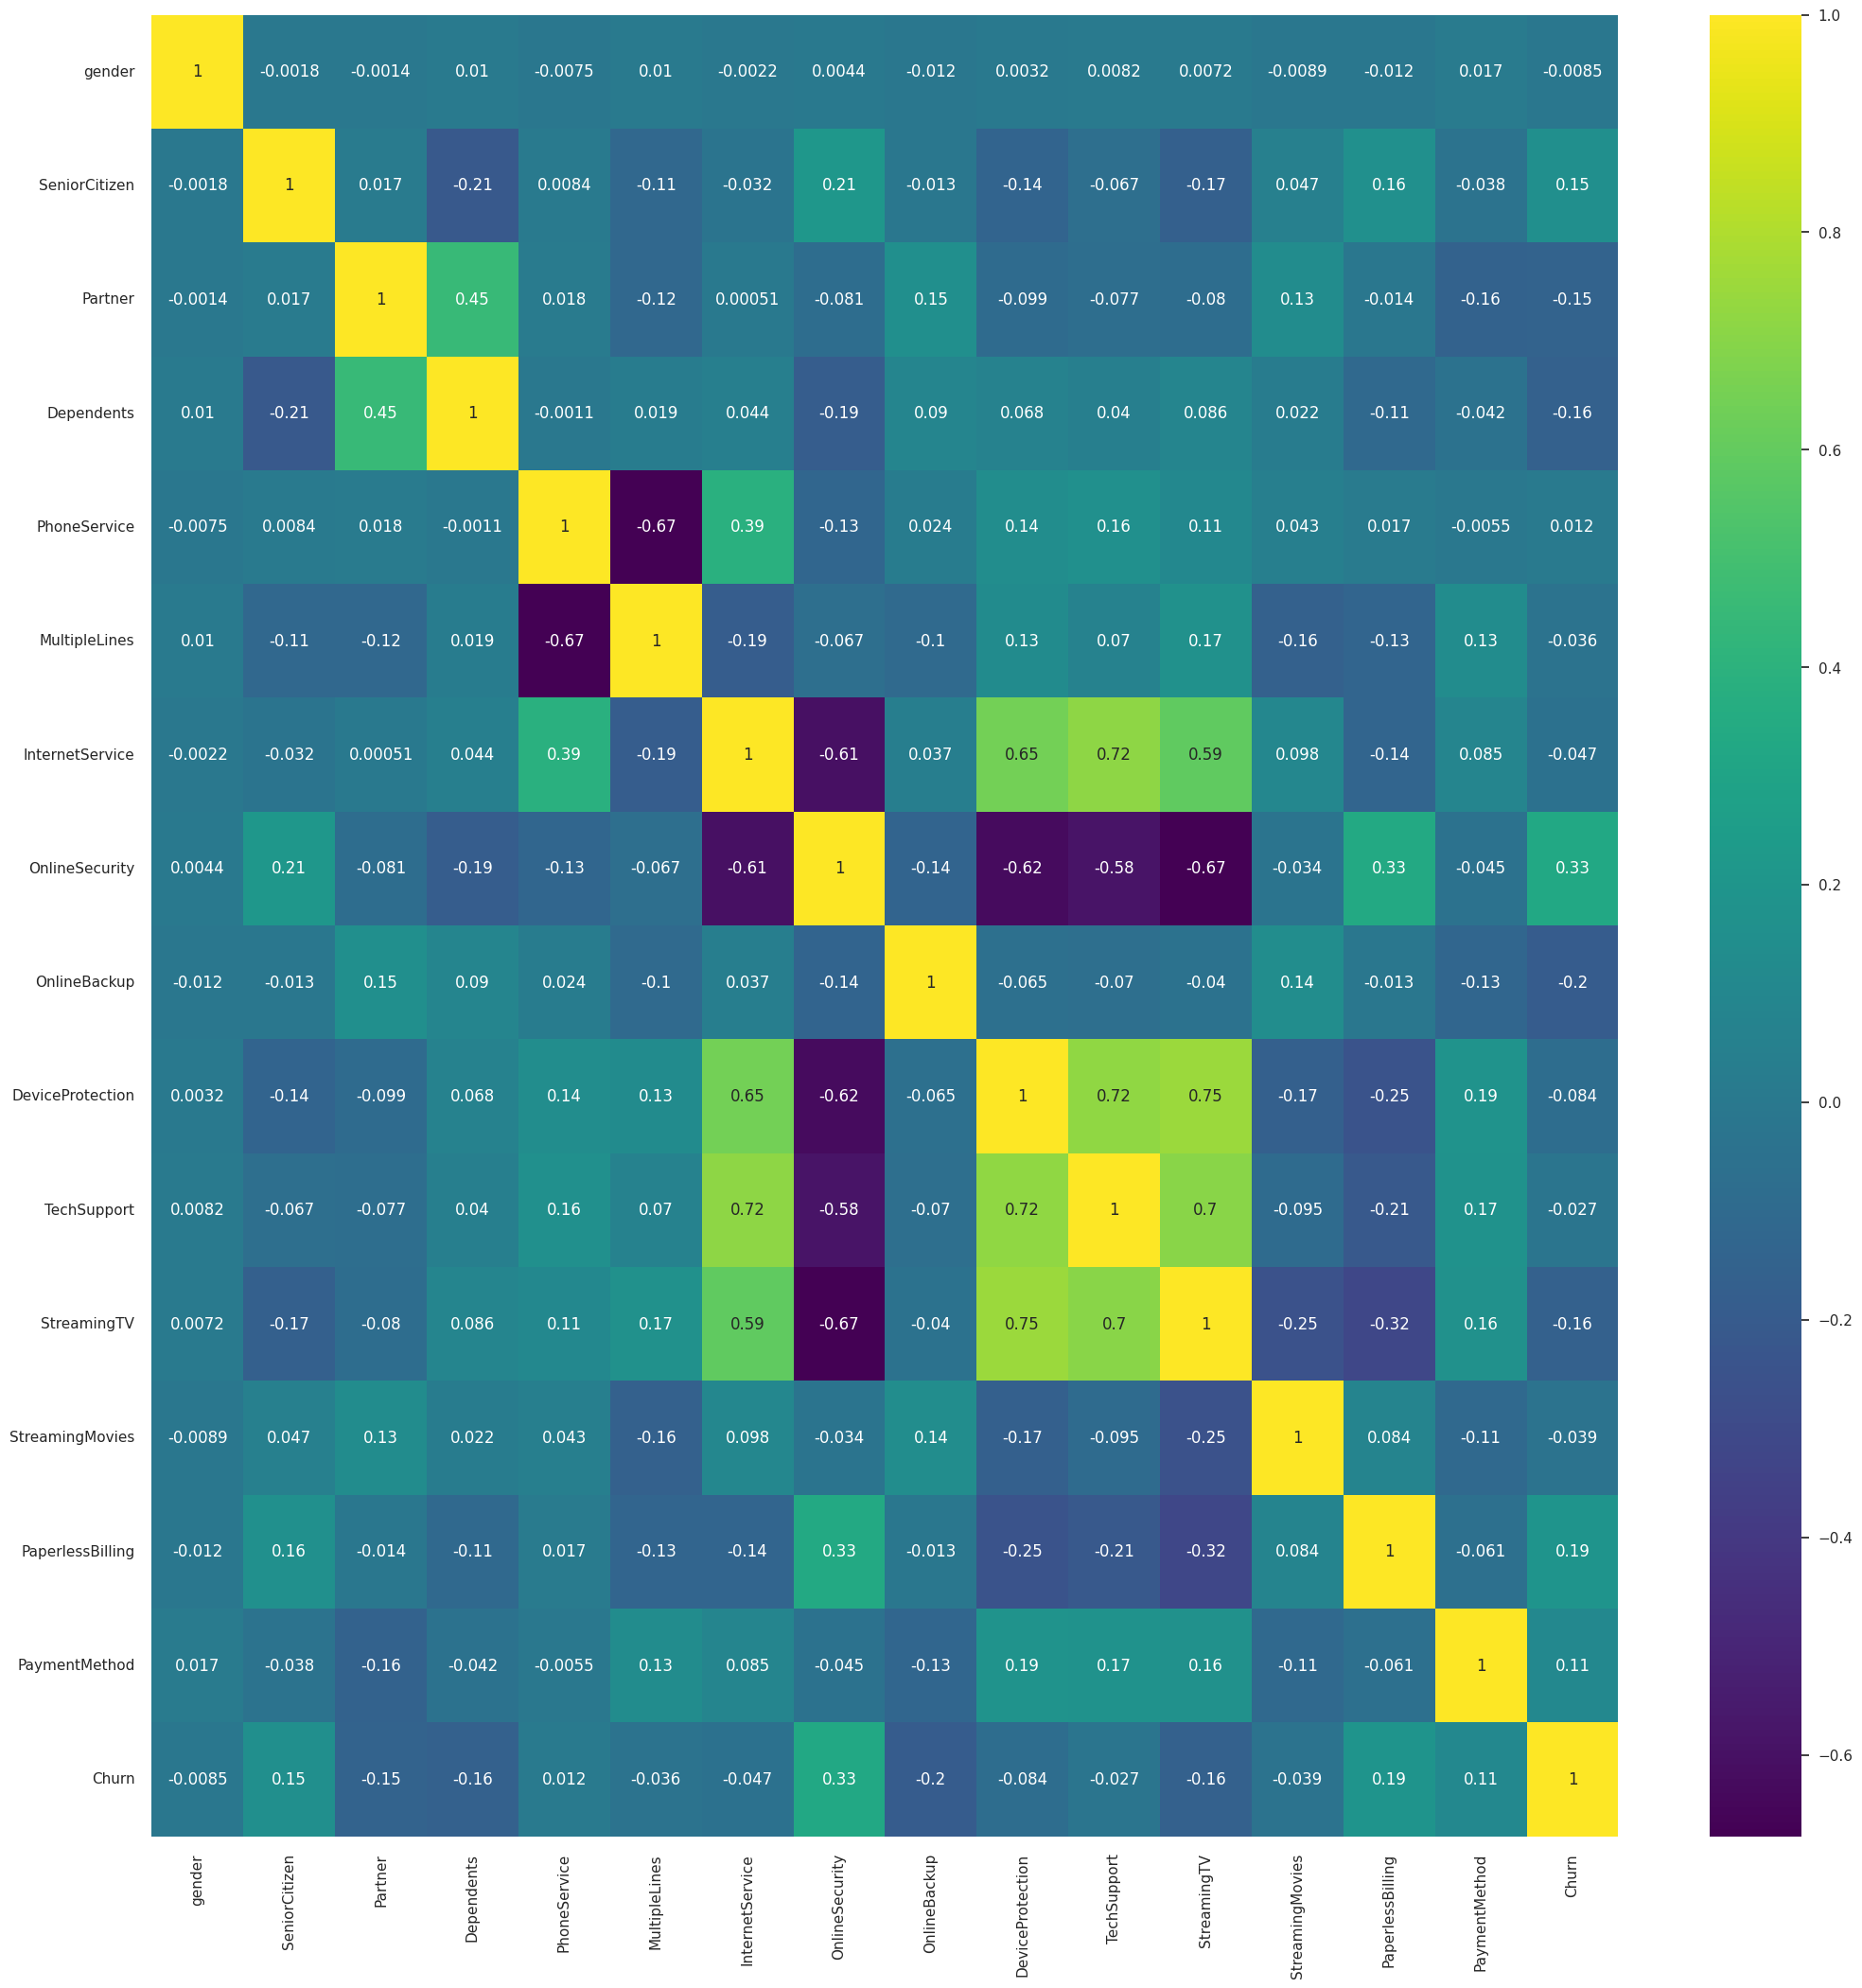

In [ ]:
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', ax=ax)
plt.show()

The most correlated values with the churn is the contract which is 0.4 and it is negatively correlated.

**Q2: Which payment method has the highest churn rate?**

*   List item
*   List item



**Visualization**

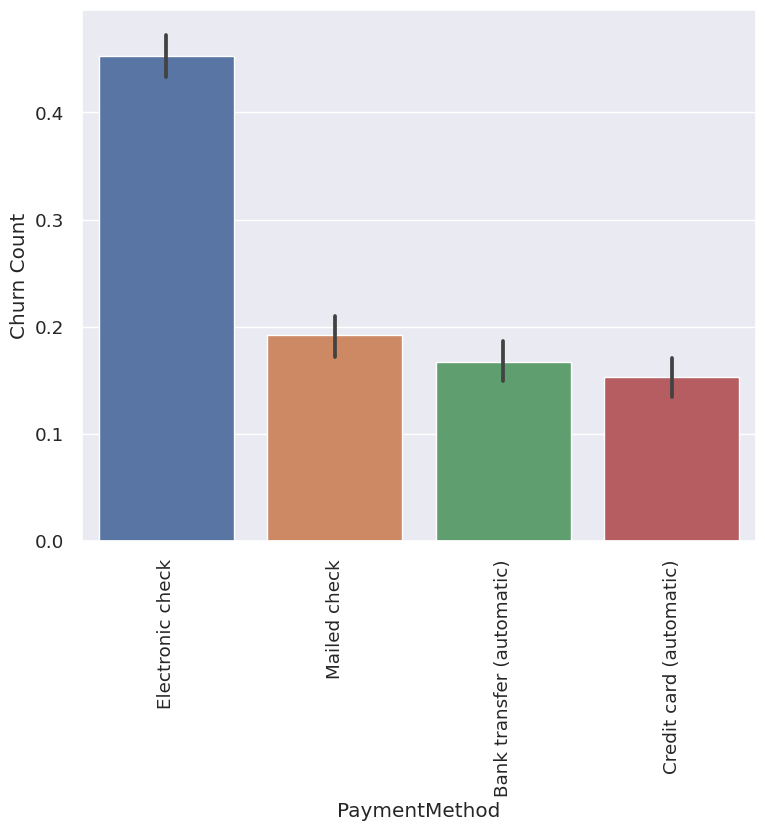

In [ ]:
#display the payment methods only aganist the churn to see which method has the highest churn
sns.set(font_scale=1.2)
plt.figure(figsize=(40, 40))

plt.subplot(5, 4, i)
g = sns.barplot(x='PaymentMethod', y='Churn', data=df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.ylabel('Churn Count')
plt.xlabel('PaymentMethod')

plt.show()


**Answer for Q2**: Electronic check has the highest churn rate.



**Q3: After how many months do customers commonly churn?** (Hint: show and interpret the distribution)

**Visualization**

25th Percentile: 2.00 months
50th Percentile (Median): 10.00 months
75th Percentile: 29.00 months


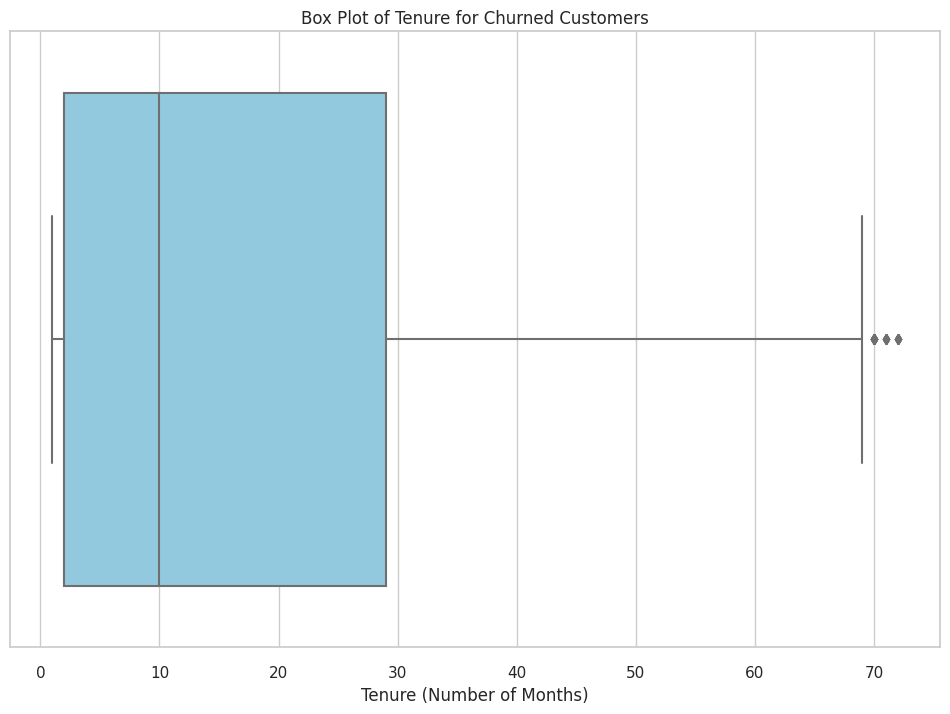

In [ ]:

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Assuming df is your DataFrame and 'tenure' is the column of interest
churned_customers = df[df['Churn'] == 1]
sns.boxplot(x=churned_customers['tenure'], color='skyblue')
plt.title('Box Plot of Tenure for Churned Customers')
plt.xlabel('Tenure (Number of Months)')

# Calculate percentiles
percentiles = np.percentile(churned_customers['tenure'], [25, 50, 75])

# Print percentiles
print(f"25th Percentile: {percentiles[0]:.2f} months")
print(f"50th Percentile (Median): {percentiles[1]:.2f} months")
print(f"75th Percentile: {percentiles[2]:.2f} months")

plt.show()


:**Answer for Q3**: 25% of the customers churn after two months, 50% of the customers (Median) after 10 months,75% of customers churn after 29 Months.

## Data Preparation for Modelling

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
df_encoded = df.copy()


In [ ]:
#Label encoding the contract since it is ordinal and we can use it later in the modeling into {0,1,2}
df_encoded['Contract'] = df_encoded['Contract'].cat.codes
df_encoded['Contract']



0       0
1       1
2       0
3       1
4       0
       ..
7027    1
7028    1
7029    0
7030    0
7031    2
Name: Contract, Length: 7032, dtype: int8

In [ ]:
#Removing the contract from the array we created since it is not categorical anymore because we encoded it into numbers
categorical_features.remove('Contract')


In [ ]:
#Getting the meta data in the array of categorical columns to see which columns "metadata" we can drop before modeling to save resources.
df_encoded = pd.get_dummies(df_encoded, columns=categorical_features)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 44 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   Contract                                 7032 non-null   int8   
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   Churn                                    7032 non-null   int8   
 6   gender_Female                            7032 non-null   uint8  
 7   gender_Male                              7032 non-null   uint8  
 8   Partner_No                               7032 non-null   uint8  
 9   Partner_Yes                              7032 non-null   uint8  
 10  Dependents_No                            7032 no

In [ ]:
#We are dropping one values of the binary columns because we don't have to use both values because if it is for example if the customer churned is not male, then it is defintely female so it is meaningless to include both values as it is waste of resourses we remove one of the values
df_encoded.drop(['gender_Female', 'Partner_No','Dependents_No','PhoneService_No','PaperlessBilling_No'], axis='columns', inplace=True)
df_encoded.columns

Index(['SeniorCitizen', 'tenure', 'Contract', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_Yes', 'OnlineSecurity_No',
       'OnlineSecurity_No phone service', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'TechSupport_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'StreamingTV_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'Pay

We are dropping one values of the binary columns because we don't have to use both values because if it is for example if the customer churned is not male, then it is defintely female so it is meaningless to include both values as it is waste of resourses we remove one of the values.


## Modelling

In [ ]:
#just the basics steps to create a mode where we split the data into training and testing and assigning the dependent variable



from sklearn.model_selection import train_test_split
#x assigned with the value of the dataframe with churn column dropped
#y is assigning values in the churn column
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Here we are creating decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
#creating a decision tree classifier
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Using the leftmost branch,The customer is likely to churn (class = Yes) if the contract is month-to-month, the internet service is fiber optic, the monthly charges are more than 93.675, the tenure is less than or equal to 3.5, the total charges are less than or equal to 33.4, and the payment method is not mailed checks. This branch travels the shortest distance and ends at a leaf node with values of [0, 10] and gini = 0.0.

### Tree Visualization

In [ ]:
#Basic steps to visulaize the decision tree model after creating the model

import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree_clf, out_file=None,
                           feature_names=X.columns,
                           class_names=['No', 'Yes'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph
# building a decision tree model
# alternatively, to export:
#graph.render()

## Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# training stt evaluation
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
# testing set evaluation
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:")
        print("===============================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
#outputting the training and test evaluation results including the confusion Matrix

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.86%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   3614.00 1308.00      1.00    4922.00       4922.00
_______________________________________________
Confusion Matrix: 
 [[3613    1]
 [   6 1302]]

Test Result:
Accuracy Score: 71.18%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision    0.82   0.46      0.71       0.64          0.72
recall       0.79   0.51      0.71       0.65          0.71
f1-score     0.80   0.48      0.71       0.64          0.72
support   1549.00 561.00      0.71    2110.00       2110.00
_______________________________________________
Confusion Matrix: 
 [[1217  332]
 [ 

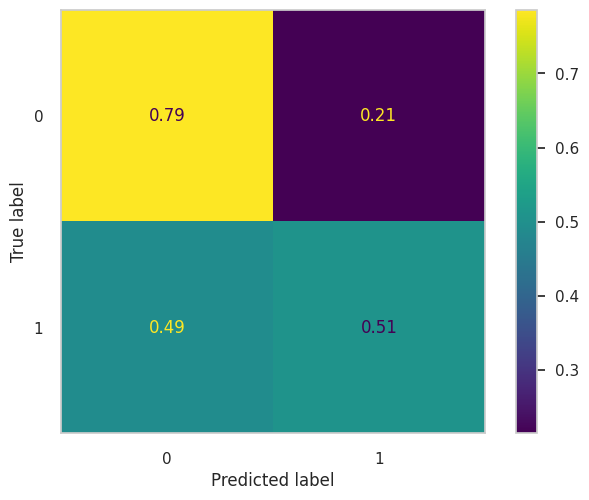

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# getting confusion matrix
cm = confusion_matrix(y_test, tree_clf.predict(X_test), labels=tree_clf.classes_,normalize='true')
#Displaying it
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree_clf.classes_)
disp.plot()
plt.grid(False)

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score
# Make predictions on the testing set
pred = tree_clf.predict(X_test)
# calculate the precision,recall ,and f1 score
print('Precision: ',precision_score(y_test,pred))
print('=======================================')
print('Recall: ',recall_score(y_test,pred))
print('=======================================')
print('F1_score: ',f1_score(y_test,pred))

Precision:  0.4619124797406807
Recall:  0.5080213903743316
F1_score:  0.4838709677419355


since the classes are imbalanced, accuracy won't be used and instead we'll be using F1 since what's important is to predict whether the customer will churn or not ,it tells us the customers that the model predicted will churn and they indeed churned

## Bonus (Optional)